Задание
1. Скачайте материалы к занятию.
2. Проанализируйте ряды и сделайте их стационарными.
3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

Сначала импортируем все библиотеки:

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# Перейдем к анализу

Загрузим датасеты:

In [3]:
series_airline = pd.read_csv("international-airline-passengers.csv")
series_car_sale = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")
series_sales_company = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

Посмотрим что мы загрузили:

In [4]:
series_airline[:5]

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [5]:
series_car_sale[:5]

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [6]:
series_sales_company[:5]

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


Преобразуем данные

In [7]:
print('series_airline')
print(series_airline.info())
print('')
print('series_car_sale')
print(series_car_sale.info())
print('')
print('series_sales_company')
print(series_sales_company.info())

series_airline
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Month                                                                           145 non-null    object 
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None

series_car_sale
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Count   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB
None

series_sales_company
<class 'pandas.core.frame.DataFrame'>
RangeInd

Что мы будем делать:
*   series_airline - переименуем колонку "International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60" на "Count" для удобства отображения
*   Поменяем тип столбца с временными отсечками в datetime
*   Установим индексом данных столбец с временными отсечками и убедимся, что он монотонно возрастает

In [8]:
series_airline.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Count'}, inplace = True )

In [9]:
series_airline

,Month,Count
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
series_airline.drop(labels = [144],axis = 0, inplace = True)

*Поменяем тип столбца с временными отсечками в datetime* Во всех датасетах формат данных год-месяц

In [11]:
series_airline['Month'] = pd.to_datetime(series_airline['Month'], format="%Y-%m")
series_car_sale['Month'] = pd.to_datetime(series_car_sale['Month'], format="%Y-%m")
series_sales_company['Month'] = pd.to_datetime(series_sales_company['Month'], format="%Y-%m")

*Установим индексом данных столбец с временными отсечками и убедимся, что он монотонно возрастает*

In [12]:
series_airline.set_index('Month', inplace=True)
series_car_sale.set_index('Month', inplace=True)
series_sales_company.set_index('Month', inplace=True)

In [13]:
print('series_airline ', series_airline.index.is_monotonic_increasing)
print('series_car_sale ', series_car_sale.index.is_monotonic_increasing)
print('series_sales_company ', series_sales_company.index.is_monotonic_increasing)

series_airline  True
series_car_sale  True
series_sales_company  True


Посмотрим что у нас получилось итого:

In [14]:
series_airline[:5]

,Count
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [15]:
series_car_sale[:5]

,Count
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [16]:
series_sales_company[:5]

,Count
Month,
1965-01-01,154
1965-02-01,96
1965-03-01,73
1965-04-01,49
1965-05-01,36


In [17]:
print('series_airline')
print(series_airline.info())
print('')
print('series_car_sale')
print(series_car_sale.info())
print('')
print('series_sales_company')
print(series_sales_company.info())

series_airline
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None

series_car_sale
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 1960-01-01 to 1968-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   108 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None

series_sales_company
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   77 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB
None


### Анализировать мы будем каждый датасет по-отдельности

In [21]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

**series_airline**

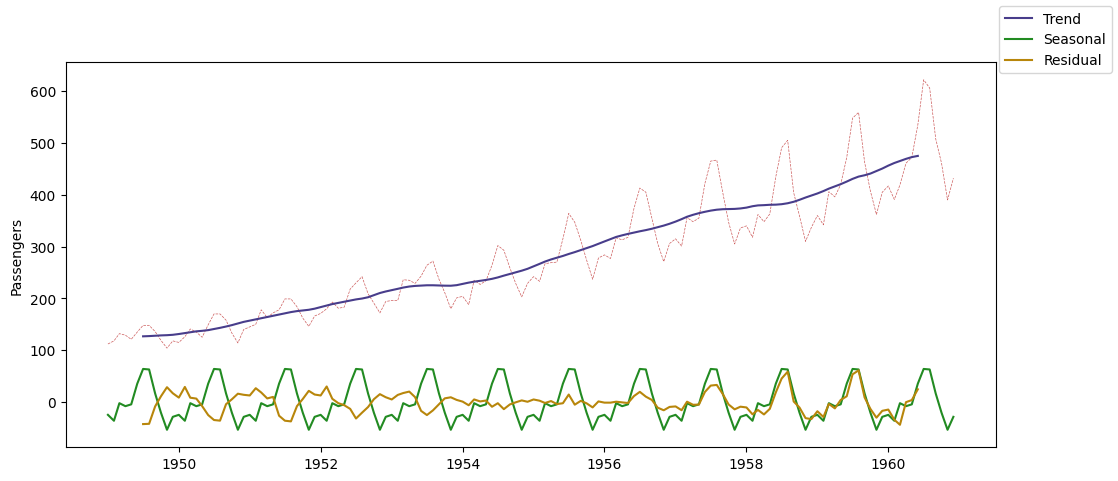

In [19]:
decomposed = seasonal_decompose(series_airline['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_airline['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

**Мы видим, что в датасете series_airline: Присутствует возрастающий тренд и ежегодную сезонность**

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


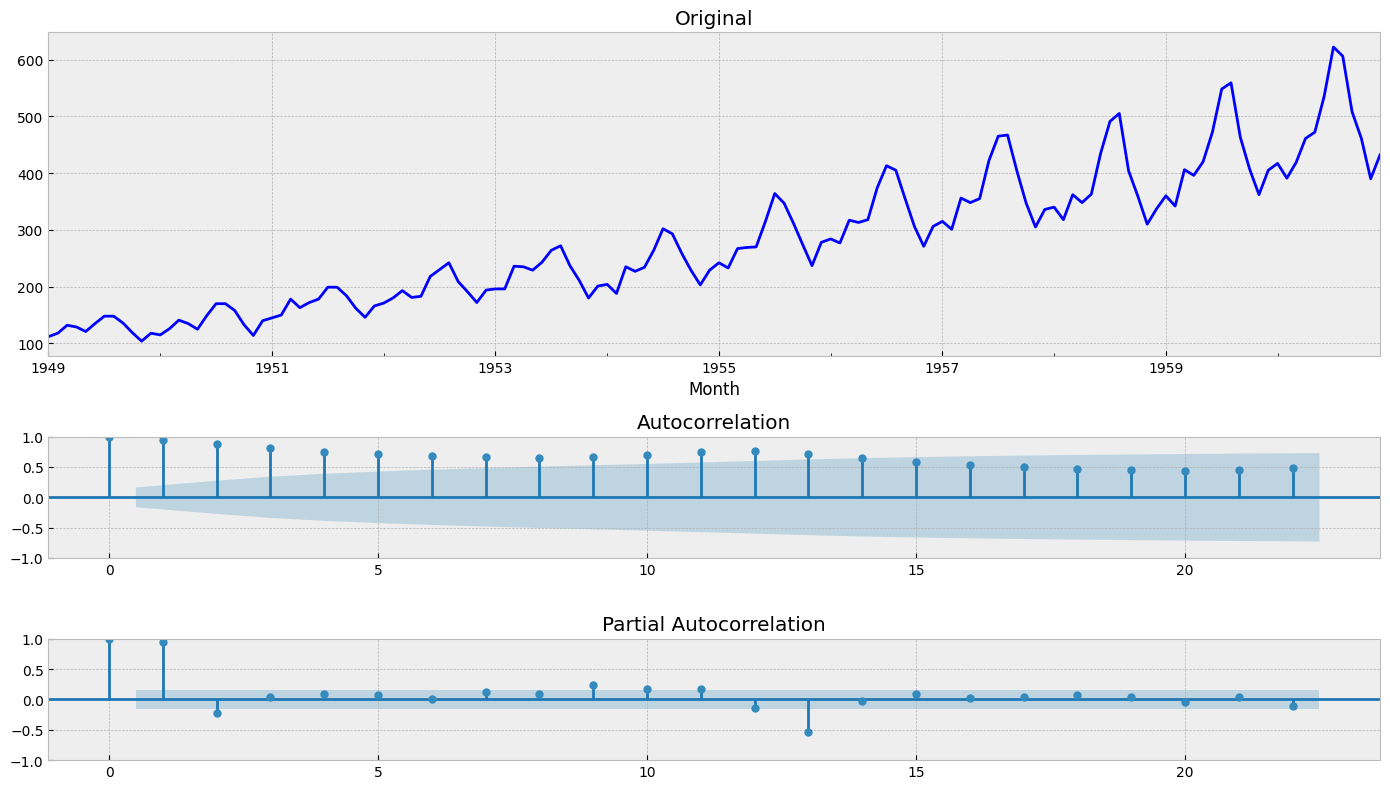

In [22]:
tsplot(series_airline['Count'])

*Теперь посмотрим стационарность временного ряда:*

In [23]:
adf_test = adfuller(series_airline['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9918802434376409


**Значение p-value более 5% говорит нам о том, что можно отвергнуть нулевую гипотезу (Временной ряд стационарен) и мы можем говорить о нестационарности временного ряда**

**series_car_sale**

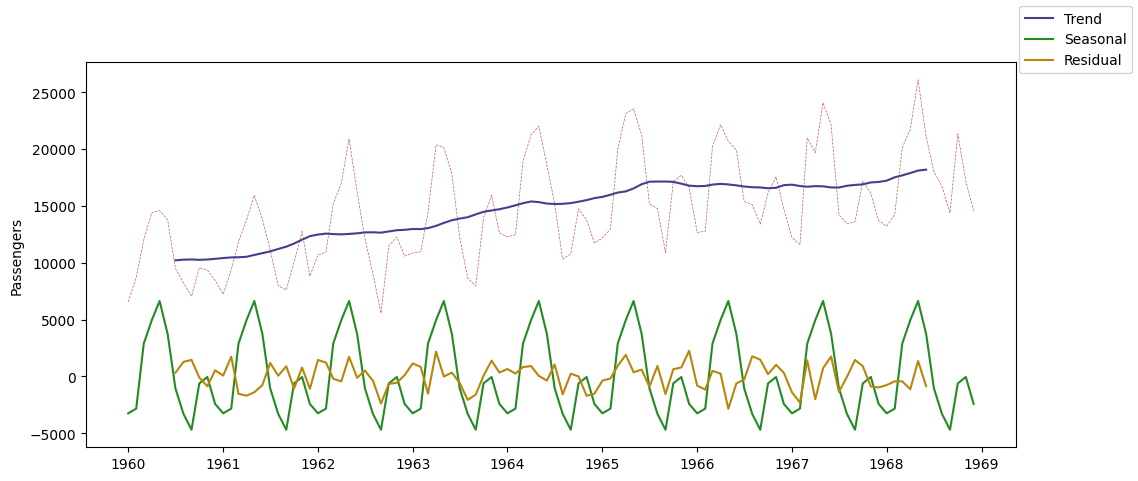

In [24]:
decomposed = seasonal_decompose(series_car_sale['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_car_sale['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

**Мы видим, что в датасете series_car_sale: Присутствует возрастающий тренд и ежегодную сезонность.**

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


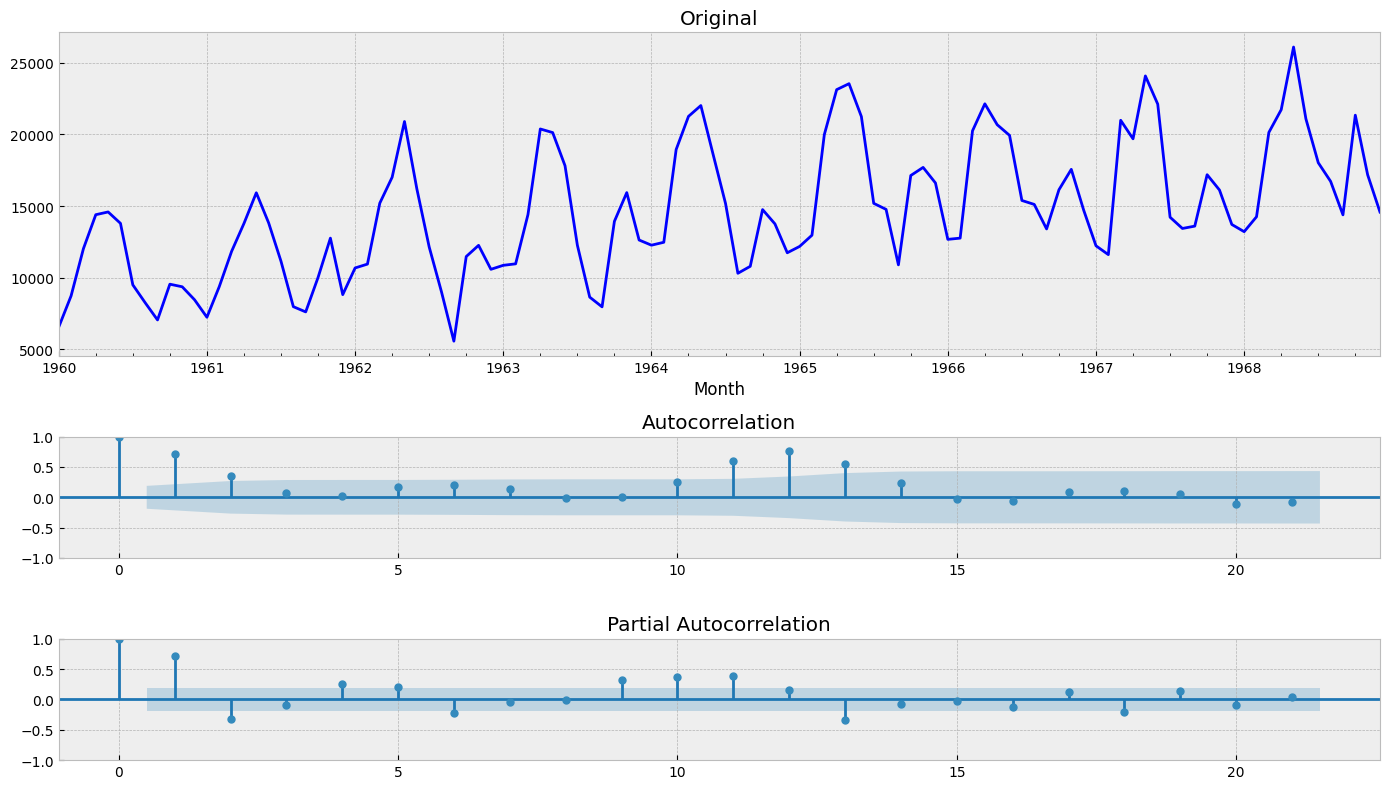

In [25]:
tsplot(series_car_sale['Count'])

*Теперь посмотрим стационарность временного ряда:*

In [26]:
adf_test = adfuller(series_airline['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9918802434376409


**Значение p-value более 5% говорит нам о том, что можно отвергнуть нулевую гипотезу (Временной ряд стационарен) и мы можем говорить о нестационарности временного ряда**

**series_sales_company**

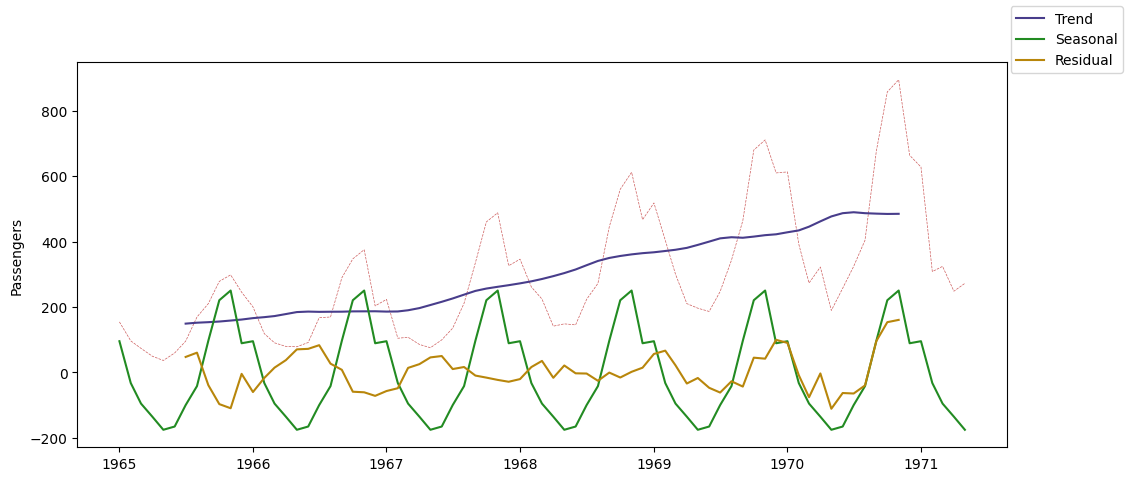

In [27]:
decomposed = seasonal_decompose(series_sales_company['Count']) 

fig, ax = plt.subplots(1, 1, figsize=[12, 5])

ax.plot(series_sales_company['Count'], c='indianred', linewidth=0.5, linestyle='--')
ax.plot(decomposed.trend, c='darkslateblue', label='Trend')
ax.plot(decomposed.seasonal, c='forestgreen', label='Seasonal')
ax.plot(decomposed.resid, c='darkgoldenrod', label='Residual')
ax.set_ylabel('Passengers')

fig.legend();

**Мы видим, что в датасете series_sales_company: Присутствует возрастающий тренд и ежегодную сезонность.**

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


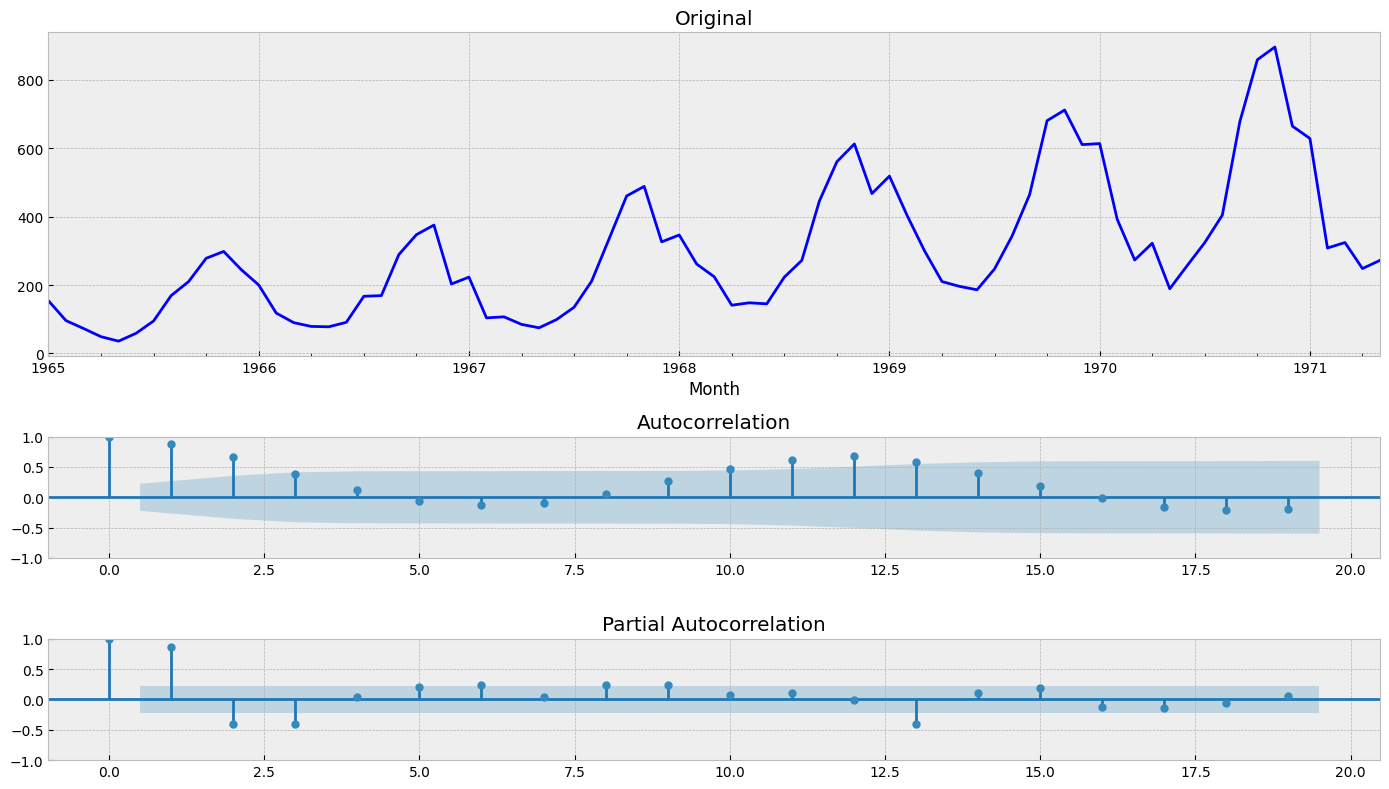

In [28]:
tsplot(series_sales_company['Count'])

*Теперь посмотрим стационарность временного ряда:*

In [29]:
adf_test = adfuller(series_airline['Count'])
 # выведем p-value
print('p-value = ' + str(adf_test[1]))

p-value = 0.9918802434376409


**Значение p-value более 5% говорит нам о том, что можно отвергнуть нулевую гипотезу (Временной ряд стационарен) и мы можем говорить о нестационарности временного ряда**

### Промежуточный вывод:
*   series_airline. Мы видим, что в датасете: Присутствует возрастающий тренд и ежегодную сезонность. Временной ряд не стационарен
*   series_car_sale. Мы видим, что в датасете: Присутствует возрастающий тренд и ежегодную сезонность. Временной ряд не стационарен
*   series_sales_company. Мы видим, что в датасете: Присутствует возрастающий тренд и ежегодную сезонность.

## Перевод в стационарные временные ряды

**series_airline**

In [36]:
series_1 = boxcox(series_airline['Count'], 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


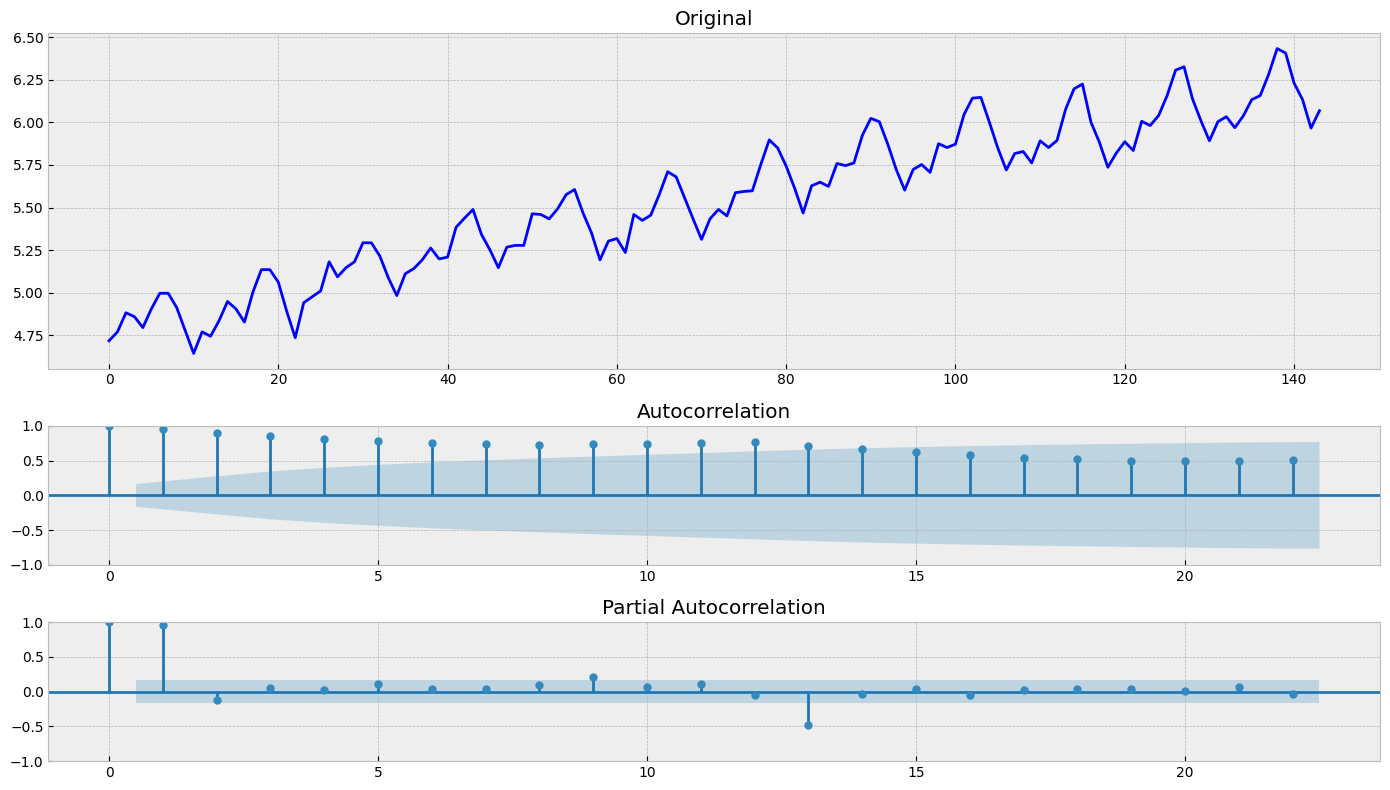

In [37]:
tsplot(series_1)

In [38]:
series_1 = series_1[1:] - series_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


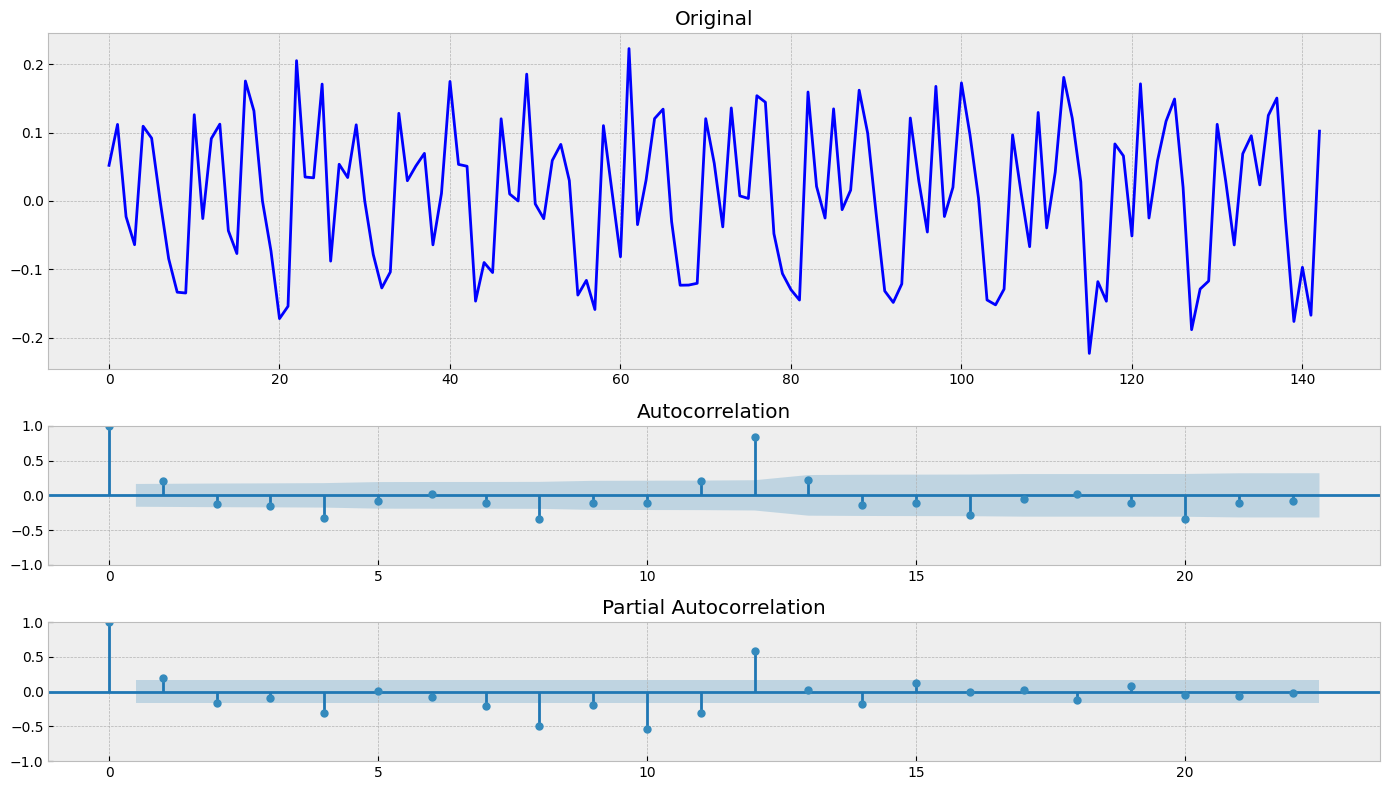

In [39]:
tsplot(series_1)

In [40]:
series_1 = series_1[12:] - series_1[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


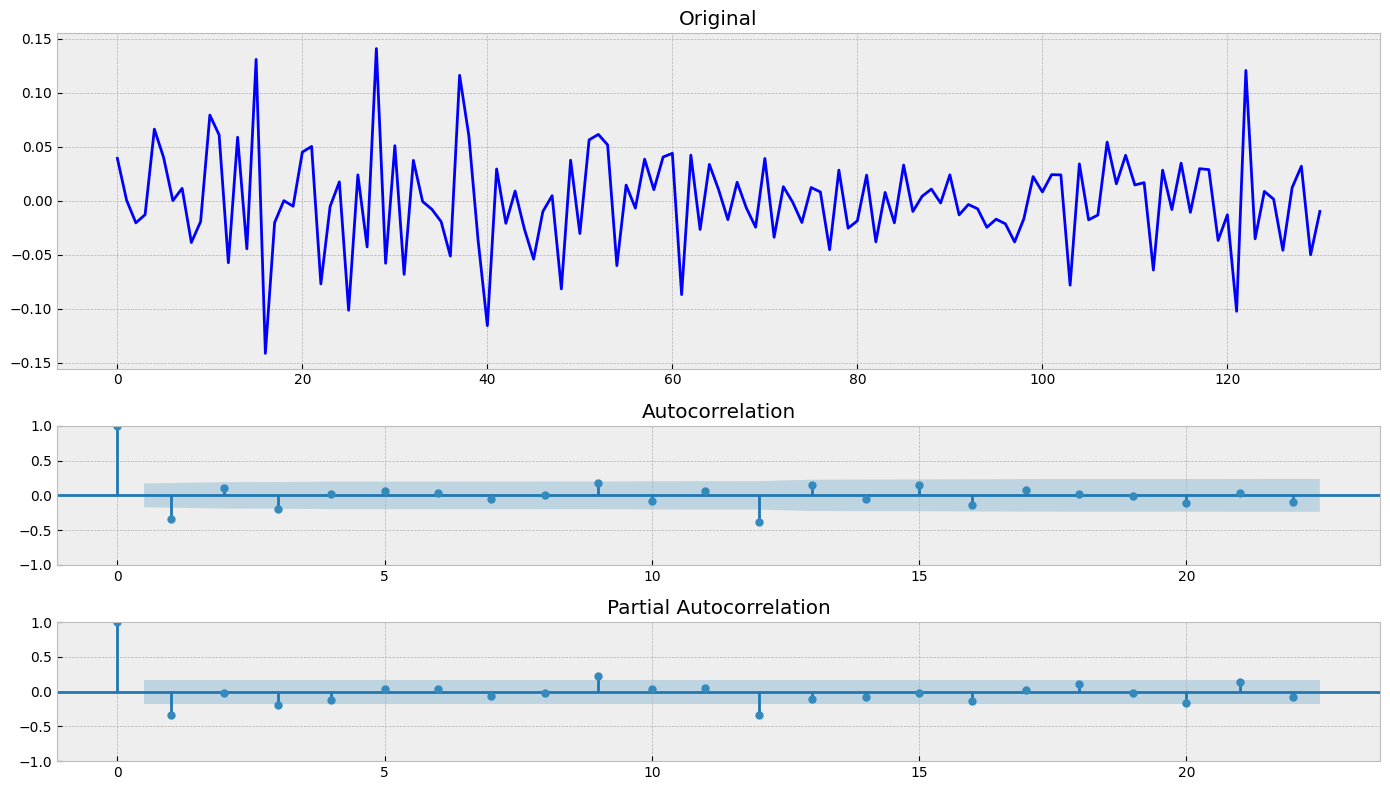

In [41]:
tsplot(series_1)

*Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда*

**series_car_sale**

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


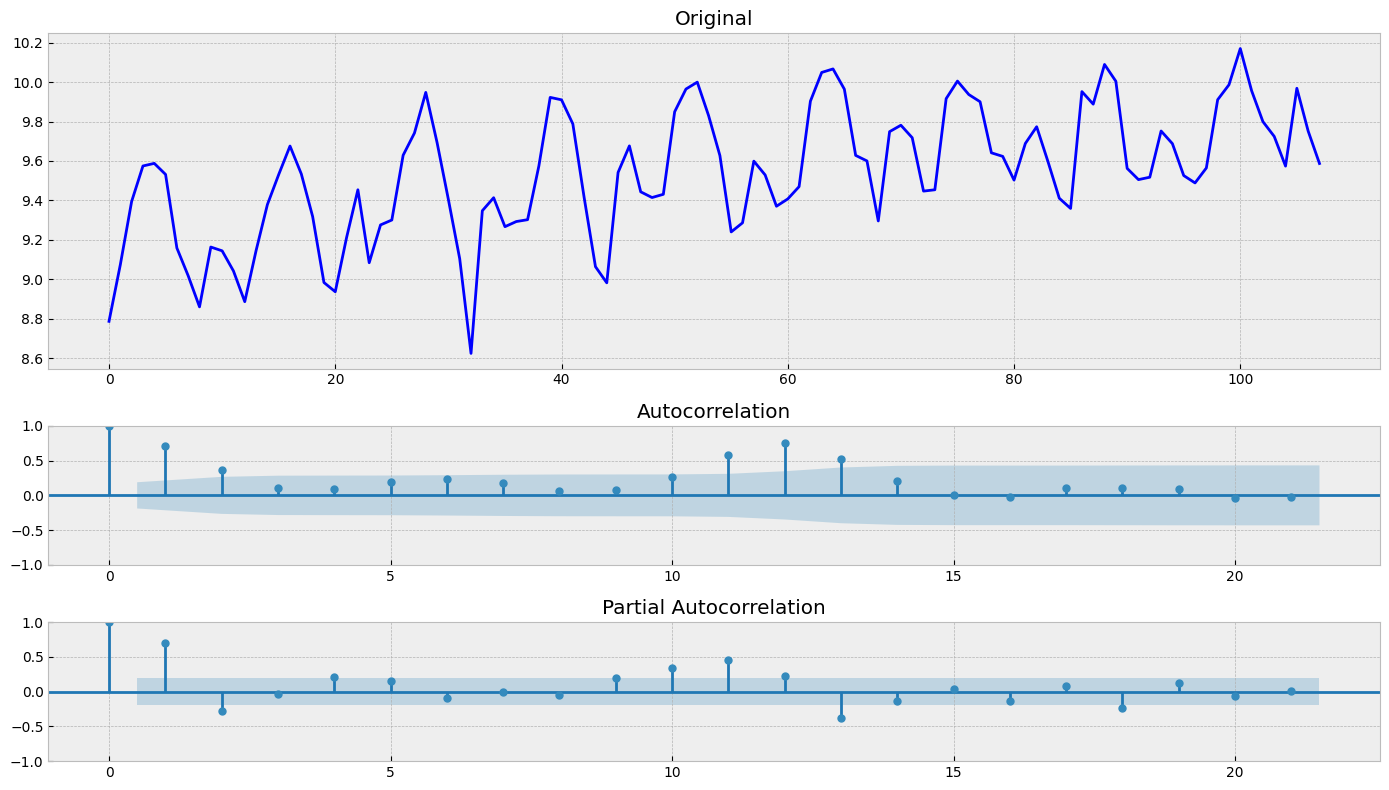

In [42]:
series_2 = boxcox(series_car_sale['Count'], 0)
tsplot(series_2)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


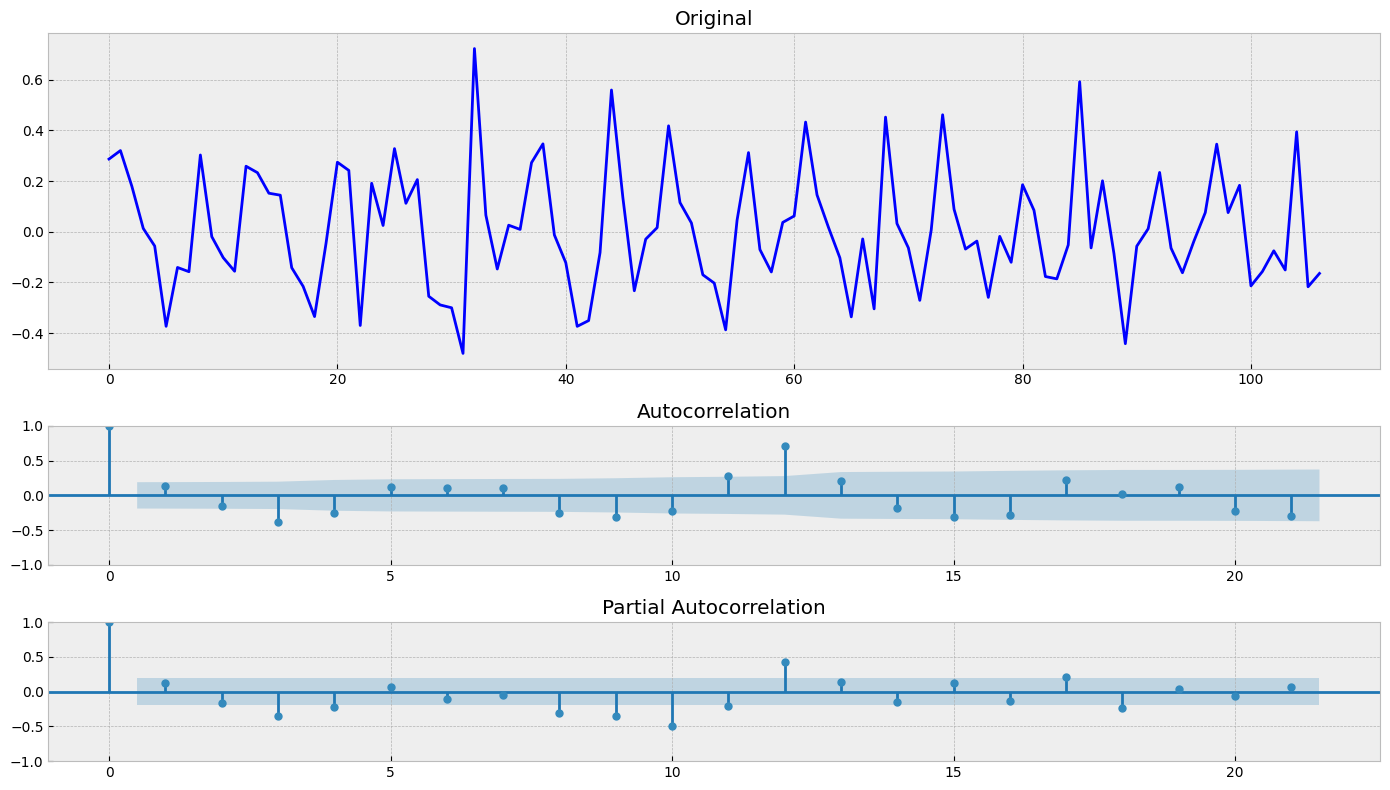

In [43]:
series_2 = series_2[1:] - series_2[:-1]
tsplot(series_2)

Results of Dickey-Fuller Test:
Test Statistic                 -3.516067
p-value                         0.007584
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


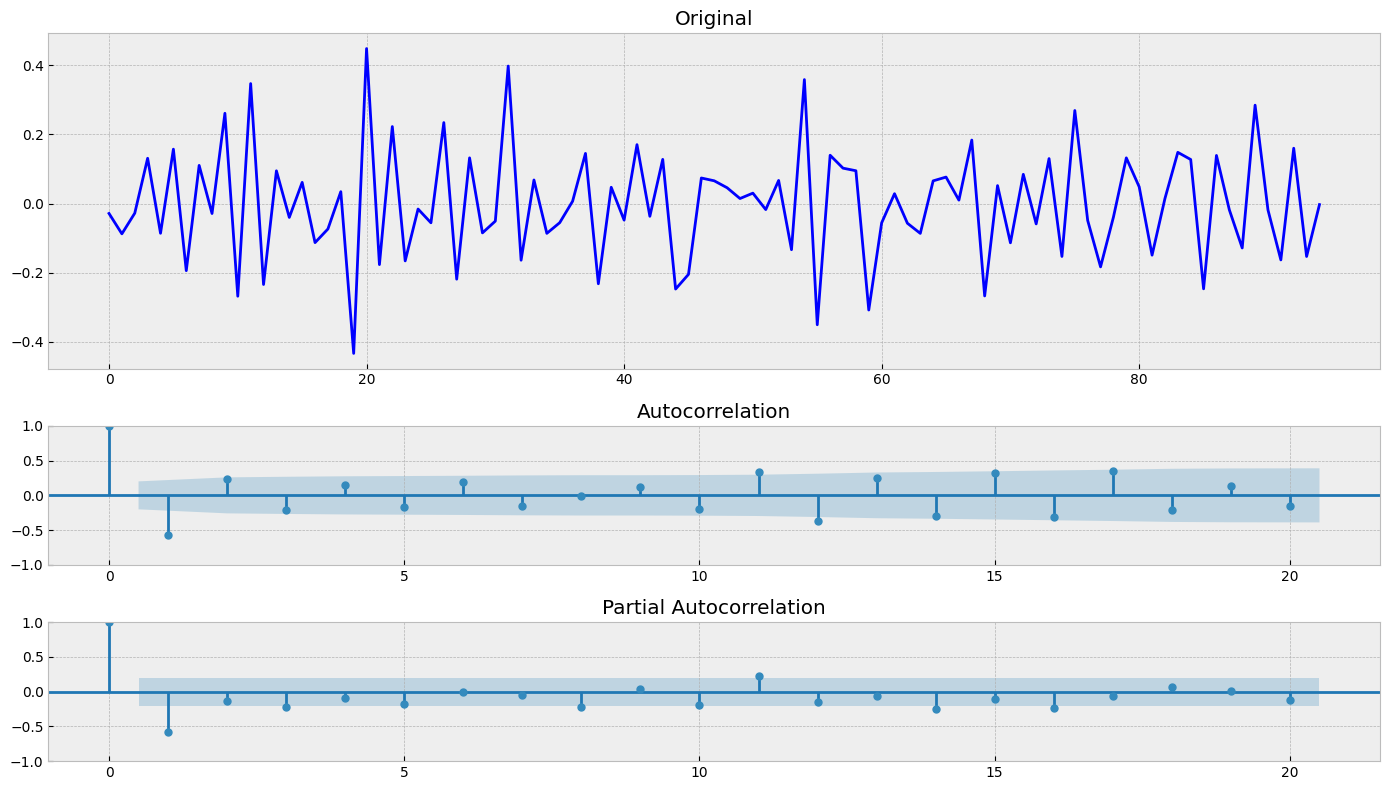

In [44]:
series_2 = series_2[12:] - series_2[:-12]
tsplot(series_2)

*Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда*

**series_sales_company**

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


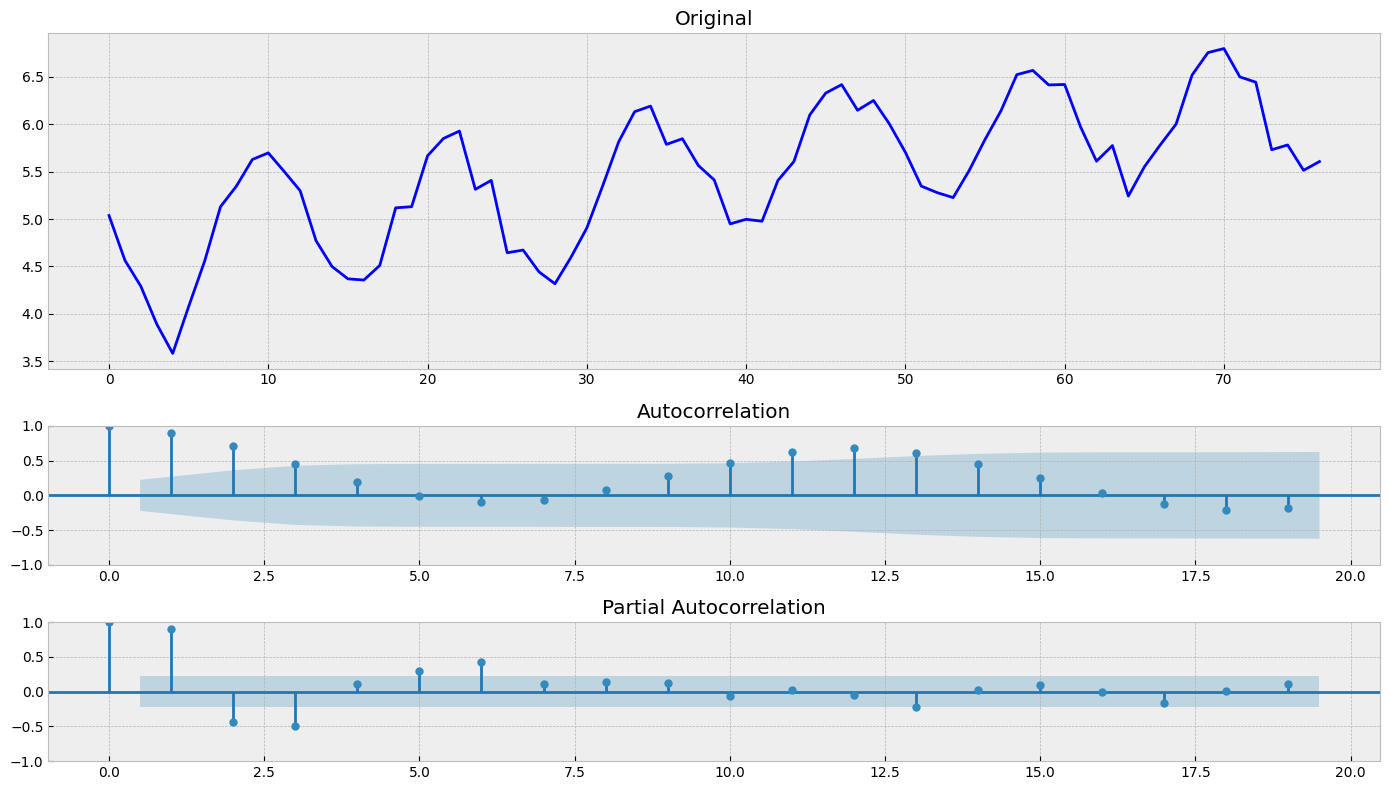

In [45]:
series_3 = boxcox(series_sales_company['Count'], 0)
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


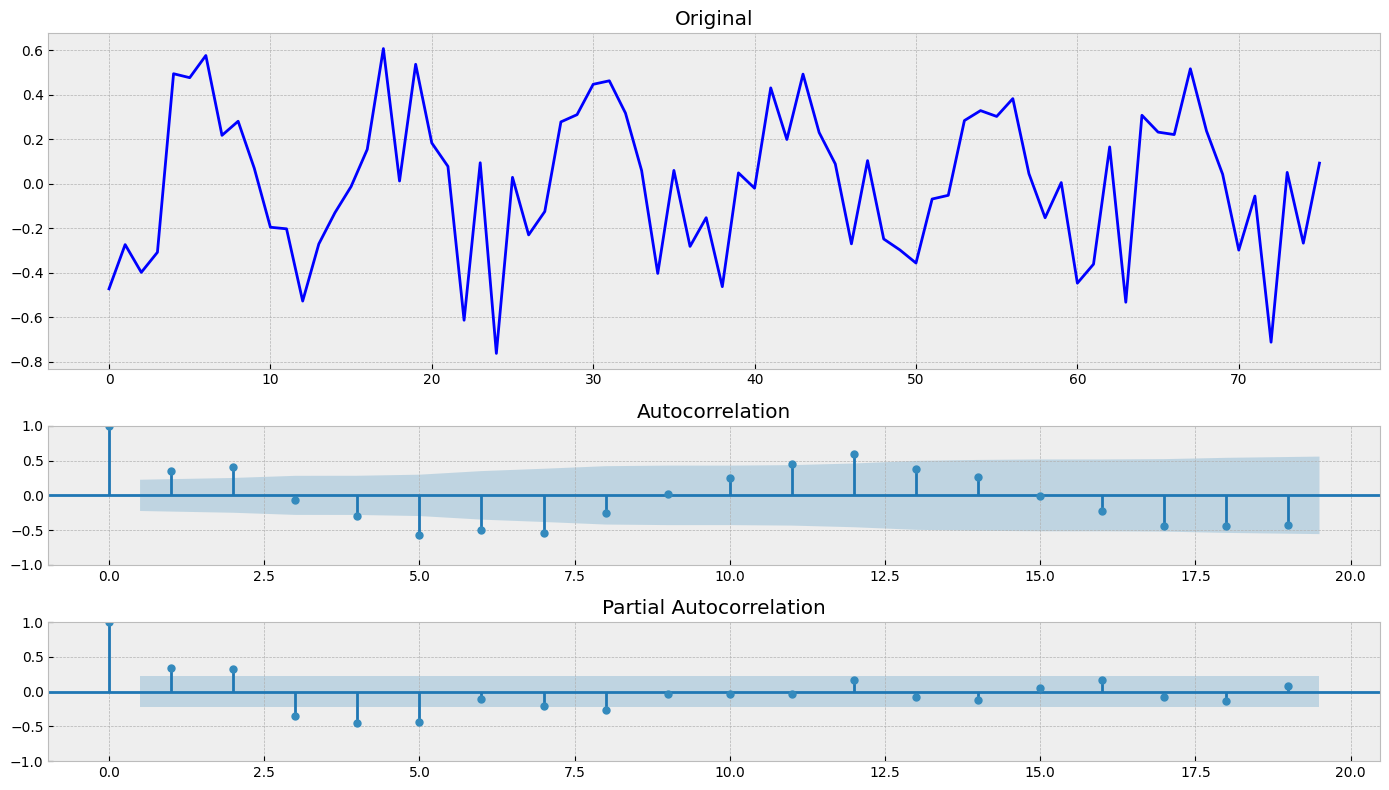

In [46]:
series_3 = series_3[1:] - series_3[:-1]
tsplot(series_3)

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


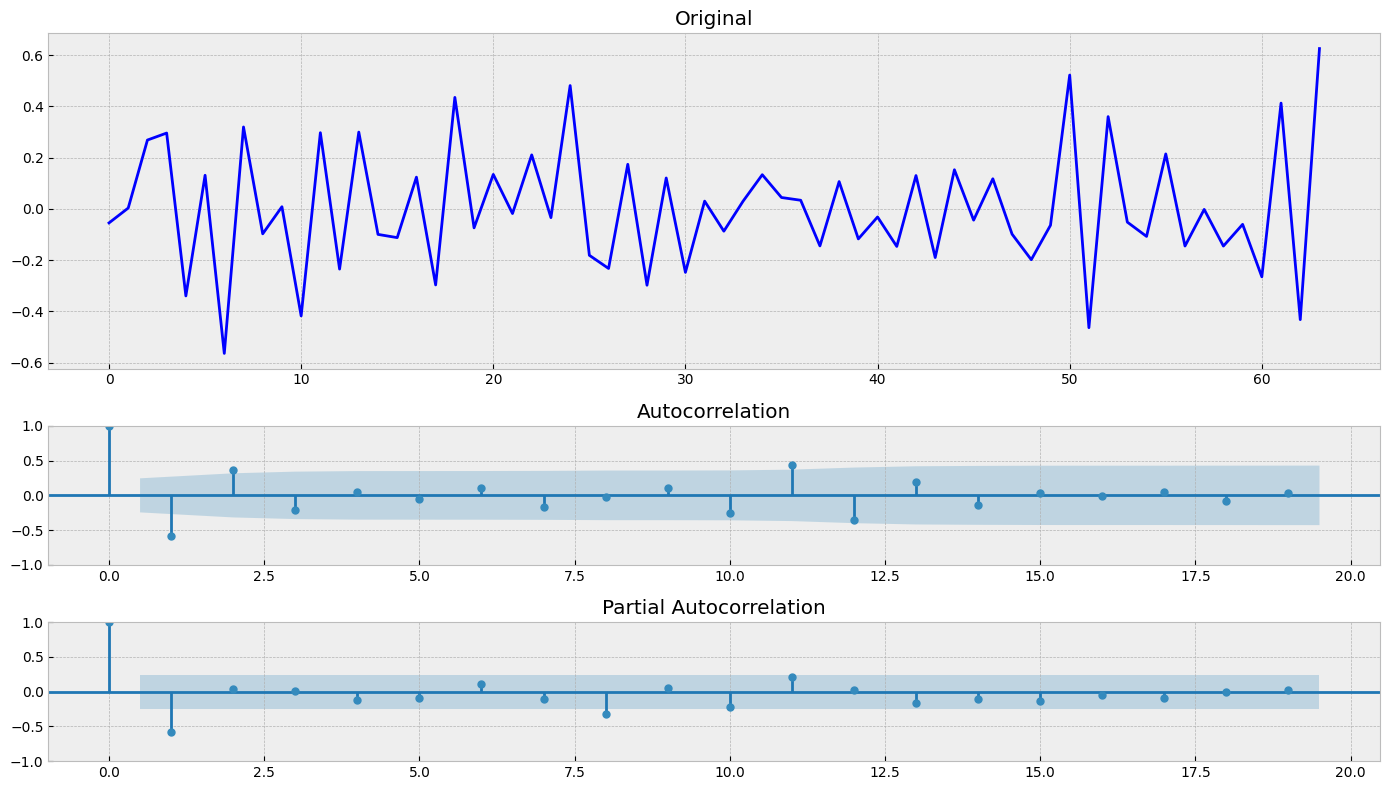

In [47]:
series_3 = series_3[12:] - series_3[:-12]
tsplot(series_3)

*Теперь значение p-value менее 5%, это говорит нам о том, что временной ряд стационарен и графики коррелограмм отвергают гипотезу о нестационарности ряда*